# Contents of this notebook:
- note-- the trajectory printouts are saved into a separate ascii file from IIEOUT

- Read and plot the trajectories from the ascii_xyz (Unit 8) and ascii_kep (Unit 10) files



#IIS SatID = 9806701     





I do actually have a couple of questions:
1. When you do post analysis of a run of GEODYN, do you use residual and trajectory data from the orbit and residual files (ORBFIL and RESIDU cards) or the ascii printouts (ORBTVU and OBSVU)?  As of now I'm using the ascii printout, but I'm not sure if the same information is in the dedicated files.
2. I am using a "benchmark" run set up by David Rowlands at Goddard (maybe you have heard of him?) of the ISS being tracked by GPS data.  The residuals and trajectories are very complicated and don't seem to include the ISS information, (e.g. the trajectory pintout output doesn't include trajectory information on the ISS).  The residuals on the other hand are the residuals for each independent GPS, and not of the ISS.  I guess my question is: should I be seeing residuals and trajectories of the ISS satellite specifically, or is my understanding off?

## Import relevant packages and identify the data location 

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
import os.path


In [6]:
# import sys  
# sys.path.insert(0, '/content/drive/My Drive/GEODYN-KAMODO Project/')
# /content/drive/My Drive/GEODYN-KAMODO Project/RUNS/adding_resid_orbit_printout/iieout

runs_path = '/content/drive/My Drive/GEODYN-KAMODO Project/RUNS/ISS_GPS/adding_resid_orbit_printout/'
file = runs_path + 'ascii_xyz'


## Read in the ASCII trajectory print files




In [7]:
ascii_xyz_file = runs_path + 'ascii_xyz'
ascii_kep_file = runs_path + 'ascii_kep'

print(ascii_xyz_file)
print(ascii_kep_file)

print(os.path.isfile(ascii_xyz_file) )
print(os.path.isfile(ascii_kep_file) )


/content/drive/My Drive/GEODYN-KAMODO Project/RUNS/ISS_GPS/adding_resid_orbit_printout/ascii_xyz
/content/drive/My Drive/GEODYN-KAMODO Project/RUNS/ISS_GPS/adding_resid_orbit_printout/ascii_kep
True
True


### Important:  First, how many iterations of the orbit are there?



In [8]:
iieout_file = runs_path + 'iieout'
text = 'CONVERGENCE'
# line_nos = []

with open(iieout_file, 'r') as f:
        for line_no, line in enumerate(f):
            if text in line:
              line_text = line
              print(line)

              # line_nos.append(line_no)
num_iters = float(line_text[39:42])-1
num_iters           

 CONVERGENCE WITHIN  2.0 PERCENT AFTER  7 ITERATIONS



6.0

In [9]:
# find the satellites in the GEODYN Run:

text="STATION-SATELLITE CONFIGURATION  DSS1WRNG           9806701"
allsats = []
with open(iieout_file, 'r') as f:

  for line_no, line in enumerate(f):
      if text in line:
        # print(line[90:100])
        allsats.append(int(line[90:100]))
  #         line_no_1 =lines_list 

SatIDs = []
for sat in allsats:
    if sat not in SatIDs:
        SatIDs.append(sat)

len(SatIDs)
# SatIDs

23

In [10]:
# find the satellites in the GEODYN Run:

text="ARC  1 FOR INNER ITERATION  6 OF GLOBAL ITERATION 1"
allsats = []
with open(ascii_xyz_file, 'r') as f:

  for line_no, line in enumerate(f):
      if text in line:
        # print(line[90:100])
        allsats.append((int(line[45:54])))
  #         line_no_1 =lines_list 

SatIDs2 = []
for sat in allsats:
    if sat not in SatIDs2:
        SatIDs2.append(sat)

len(SatIDs2)
# SatIDs2

31

In [11]:
SatIDs2

[6163016,
 5461024,
 9946114,
 5658125,
 9743134,
 5041144,
 5755155,
 5356164,
 5553175,
 6834183,
 5459194,
 5051204,
 6469036,
 5345214,
 5347224,
 5460234,
 6265246,
 6062256,
 6571266,
 6366276,
 5044284,
 5757295,
 6464306,
 5652315,
 6670326,
 5950055,
 6467066,
 5848075,
 6572086,
 6468096,
 6573106]

In [12]:

mydict= {}
for val_sat in SatIDs2:
    # if entity.entity_id.startswith('sensor'):
        # list = remote.get_state(api, entity.entity_id)
        # data = {list.attributes['friendly_name'] : list.state}
        # for key, val in data.items():
          mydict[val_sat] = 5

In [13]:
# need to loop through and grab the data.
# If the line starts with 1 add three if not add none
# add values

In [14]:
mydict = {}
iteration = '6'


for val_sat in SatIDs2:
    # print(i,val_sat) 
    lines = []
    text = str(val_sat) + " OF ARC  1 FOR INNER ITERATION  "+ iteration
    with open(ascii_xyz_file, 'r') as f:
      for line_no, line in enumerate(f):
          if text in line:
            lines.append(line_no)
                       
           
      mydict[val_sat] = lines

# mydict

In [23]:
mydict

{5041144: [80259,
  80397,
  80534,
  80671,
  80809,
  80946,
  81083,
  81221,
  81355,
  81357,
  81493,
  81630,
  81767,
  81905,
  82042,
  82179,
  82317,
  82454,
  82589,
  82726,
  82729,
  82863,
  83001,
  83138,
  83275,
  83413,
  83550,
  83687,
  83825,
  83959,
  83961,
  84097,
  84234,
  84371,
  84509,
  84646,
  84783,
  84921,
  85058,
  85193,
  85330,
  85333,
  85467,
  85605,
  85742,
  85879,
  86017,
  86154,
  86291,
  86429,
  86563,
  86565,
  86701,
  86838,
  86975,
  87113,
  87250,
  87387,
  87525,
  87662,
  87797,
  87934,
  87937,
  88071,
  88209,
  88346,
  88483,
  88621,
  88758,
  88895,
  89033,
  89167,
  89169,
  89305,
  89442,
  89579,
  89717,
  89854,
  89991,
  90129,
  90266,
  90401,
  90538,
  90541,
  90675,
  90813,
  90950,
  91087,
  91225,
  91362,
  91499,
  91637,
  91771,
  91773,
  91909,
  92046,
  92183,
  92321,
  92458,
  92595,
  92733,
  92870,
  93005,
  93142,
  93145,
  93279,
  93417,
  93554,
  93691,
  93829,
 

In [15]:

# line_number: int # Number of the required line, 0-based 
# filename: str    # The name of the file 
# line: str        # Content of the required line 
 
# with open(ascii_xyz_file, 'r') as f: 
#     for _ in range(mydict[6163016][-1]): 
#         f.readline() 
#     line = f.readline() 
  
# print(int(line[0]))


In [16]:
data_dict = {}
isat = 5658125
iii = 0

# for iii, isat in enumerate(mydict):

B = pd.DataFrame(data={'YYMMDD'   :[],
                        'HHMM'    :[],
                        'SECONDS' :[],
                        'X'       :[],
                        'Y'       :[],
                        'Z'       :[],
                        'XDOT'    :[],
                        'YDOT'    :[],
                        'ZDOT'    :[],
                        'LAT'     :[],
                        'LONG'    :[],
                        'HEIGHT'  :[]})

for iline in mydict[isat]:
  with open(ascii_xyz_file, 'r') as f: 
    for _ in range(iline): 
        f.readline() 
    line = f.readline() 
    if int(line[0]) == 0:
      ephems_csv = pd.read_csv(ascii_xyz_file, 
                              skiprows = iline+1,
                              nrows =  3,
                              names = ['YYMMDD',
                                      'HHMM',
                                      'SECONDS',
                                      'X',
                                      'Y',
                                      'Z',
                                      'XDOT',
                                      'YDOT',
                                      'ZDOT',
                                      'LAT',
                                      'LONG',
                                      'HEIGHT',
                                    ],
                              sep = '\s+',
                              )
    elif int(line[0]) == 1:

      ephems_csv = pd.read_csv(ascii_xyz_file, 
                              skiprows = iline+3,
                              nrows =  3,
                              names = ['YYMMDD',
                                      'HHMM',
                                      'SECONDS',
                                      'X',
                                      'Y',
                                      'Z',
                                      'XDOT',
                                      'YDOT',
                                      'ZDOT',
                                      'LAT',
                                      'LONG',
                                      'HEIGHT',
                                    ],
                              sep = '\s+',
                              )

  A = pd.DataFrame(ephems_csv)
  B = pd.concat([ B, A])

index_list = []
for index, row in B.iterrows():
    try:
        float(row['HHMM'])
    except:
        index_list.append(index)
        continue

C=B.drop(index_list)

data_dict[isat] = C
print(iii,isat)

0 5658125


In [22]:
data_dict

{5658125:     YYMMDD  HHMM SECONDS            X  ... hours minutes secs                Date
 0   190420  2129      42  2.17061e+07  ...    21      29   42 2019-04-20 21:29:42
 0   190420  2144      42  2.18261e+07  ...    21      44   42 2019-04-20 21:44:42
 0   190420  2159      42  2.15631e+07  ...    21      59   42 2019-04-20 21:59:42
 0   190420  2214      42  2.09213e+07  ...    22      14   42 2019-04-20 22:14:42
 0   190420  2229      42  1.99116e+07  ...    22      29   42 2019-04-20 22:29:42
 ..     ...   ...     ...          ...  ...   ...     ...  ...                 ...
 0   190422   129      42 -1.00838e+07  ...    01      29   42 2019-04-22 01:29:42
 0   190422   144      42 -1.25625e+07  ...    01      44   42 2019-04-22 01:44:42
 0   190422   159      42 -1.48251e+07  ...    01      59   42 2019-04-22 01:59:42
 0   190422   214      42 -1.68333e+07  ...    02      14   42 2019-04-22 02:14:42
 0   190422   229      42 -1.85537e+07  ...    02      29   42 2019-04-22 02:2

In [17]:
# pd.to_datetime(isat_data['HHMM'].values.astype(int))

In [18]:
def make_datetime_column(isat_data, VERBOSE_timer):
    isat_data = data_dict[isat] 
    VERBOSE_timer=True


    if VERBOSE_timer == True:
      import time
      start = time.time()
    else:
      pass

    timeHHMM = [] 
    for i,val in enumerate(isat_data['HHMM'].values.astype(int)):
        # print(len(str(val)))
        if len(str(val)) == 3:
            timehhmm_val = '0'+ str(val)
            timeHHMM.append(timehhmm_val)
        if len(str(val)) == 2:
            timehhmm_val = '00'+ str(val)
            timeHHMM.append(timehhmm_val)
        if len(str(val)) == 4:
            timehhmm_val = str(val)
            timeHHMM.append(timehhmm_val)
        if len(str(val)) == 1:
            timehhmm_val = '000'+ str(val)
            timeHHMM.append(timehhmm_val)
    # print(val)  
    # print('1!!!!', np.shape(timeHHMM))

    isat_data['timeHHMM'] = timeHHMM

    year  = []
    month = []
    day   = []
    hours  = []
    minutes = []
    secs  = []
    microsecs = []
    for i,val in enumerate(isat_data['YYMMDD'].values.astype(int).astype(str)):
        # print(val)
        year.append('20' + val[:2])
        month.append(val[2:4])
        day.append(val[4:])
        # print('HERE',isat_data['timeHHMM'].values.astype(str)[i][:2])
        hours.append(isat_data['timeHHMM'].values.astype(str)[i][:2])
        minutes.append(isat_data['timeHHMM'].values.astype(str)[i][2:4])
        secs.append(isat_data['SECONDS'].values.astype(str)[i][:2])
        # microsecs.append(isat_data['Sec-UTC-R'][i][3:])

    isat_data['year']  = year
    isat_data['month'] = month
    isat_data['day']   = day
    isat_data['hours']  = hours
    isat_data['minutes'] = minutes
    isat_data['secs']  = secs
    # isat_data['microsecs'] = microsecs
    if VERBOSE_timer == True:
      end = time.time()
      elapsed = end - start
      print("Loop through and extract indiv date vals:",elapsed)
    else:
      pass

    fix_decimal = []
    for i,val in enumerate(isat_data['secs'].astype(str)):
    #     print(i,val)
        if val.find('.') == 1:
    #             print(i, val)
            fix_decimal.append( '0'+val[:-1])
    #             print(newval)
        else:
            fix_decimal.append( val)

    if VERBOSE_timer == True:
      end = time.time()
      elapsed = end - start
      print("Fix decimals in the seconds column:",elapsed)
    else:
      pass

    year= list(map(int, isat_data['year'].values))
    month= list(map(int, isat_data['month'].values))
    day= list(map(int, isat_data['day'].values))
    hour= list(map(int, isat_data['hours'].values))
    minute = list(map(int, isat_data['minutes'].values))
    second = list(map(int, fix_decimal))

    DATE = list(map(datetime.datetime, year,month, day, hour,minute,second ))

    if VERBOSE_timer == True:
      end = time.time()
      elapsed = end - start
      print("Put all dates in a single column:",elapsed)
    else:
      pass


        
    return(DATE)

In [19]:
date_isat = make_datetime_column(data_dict[isat], VERBOSE_timer=True) 


data_dict[isat]['Date'] = date_isat

Loop through and extract indiv date vals: 0.02686595916748047
Fix decimals in the seconds column: 0.027361631393432617
Put all dates in a single column: 0.03214144706726074


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

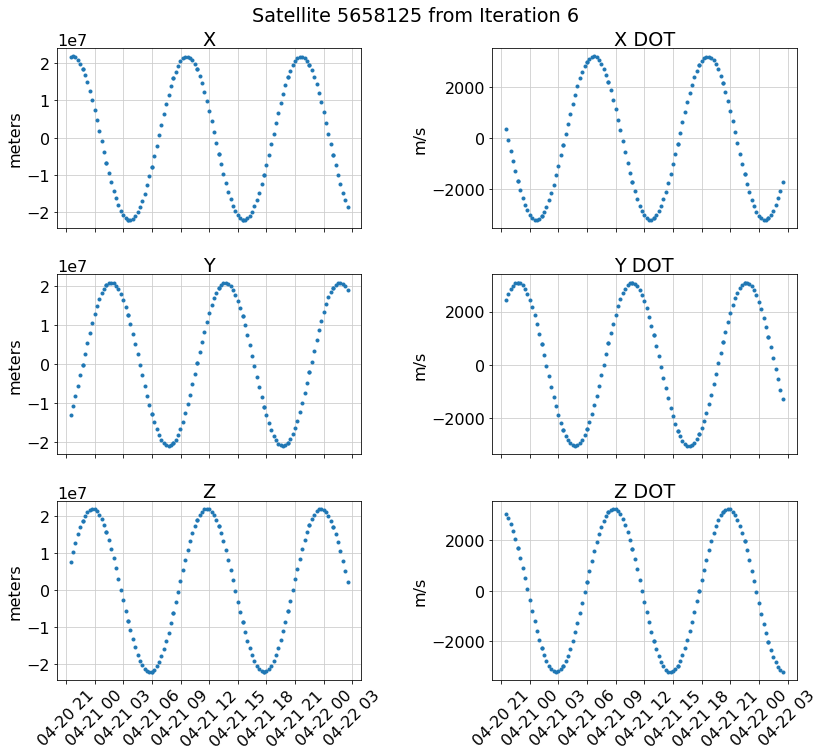

In [21]:
mpl.rcParams['lines.markersize'] = 6
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'


fig, ( axs) = plt.subplots(3,2, figsize=(12,10), sharex=True)
fig.suptitle('Satellite '+str(isat)+' from Iteration '+iteration, y=1.0)
axs[0,0].set_title('X' )
axs[0,0].plot(data_dict[isat]['Date'], data_dict[isat]['X'].values.astype(float),'.', label = 'Residuals iter 5')
axs[0,0].set(ylabel=  'meters') 

axs[1,0].set_title('Y' )
axs[1,0].plot(data_dict[isat]['Date'], data_dict[isat]['Y'].values.astype(float),'.', label = 'Residuals iter 5')
axs[1,0].set(ylabel=  'meters') 

axs[2,0].set_title('Z' )
axs[2,0].plot(data_dict[isat]['Date'], data_dict[isat]['Z'].values.astype(float),'.', label = 'Residuals iter 5')
axs[2,0].set(ylabel=  'meters') 

axs[0,1].set_title('X DOT' )
axs[0,1].plot(data_dict[isat]['Date'], data_dict[isat]['XDOT'].values.astype(float),'.', label = 'Residuals iter 5')
axs[0,1].set(ylabel=  'm/s') 

axs[1,1].set_title('Y DOT' )
axs[1,1].plot(data_dict[isat]['Date'], data_dict[isat]['YDOT'].values.astype(float),'.', label = 'Residuals iter 5')
axs[1,1].set(ylabel=  'm/s') 

axs[2,1].set_title('Z DOT' )
axs[2,1].plot(data_dict[isat]['Date'], data_dict[isat]['ZDOT'].values.astype(float),'.', label = 'Residuals iter 5')
axs[2,1].set(ylabel=  'm/s') 


# handles, labels = axs[0,0].get_legend_handles_labels()
# axs[0,0].legend(handles[::-1], labels[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 2 )


# # ax2.set(xlabel= 'Modified Julian Date') 
# ax2.set(xlabel= 'Date') 

fig.tight_layout( pad=1.5)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

# images_dir = '/content/drive/MyDrive/GEODYN-KAMODO Project/RUNS/adding_resid_orbit_printout/plots'
# plt.savefig(f"{images_dir}/trajectory_xyz_sat%diter%d.png" % (isat, int(iteration) )) 

#### Method:
- Search through the ascii files for key phrases (**Section Headers of Sorts**)
- Read in the data after the section header
  - some manual double-checking is required that this is done correctly

#### Section Header Options:
 - SPACECRAFT EPHEMERIS FOR SATELLITE #######  OF ARC  1 FOR INNER ITERATION  6 OF GLOBAL ITERATION 1






#### **Issue to be aware of:**
- Format of the IIEOUT file is correct 
    - specifically, be sure that the columns being read in are correct in the pd.read_csv()


##### Functions:
